In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
(images_train, targets_train), (images_test, targets_test) = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
print(images_train.shape)
print(targets_train.shape)

(60000, 28, 28)
(60000,)


In [39]:
#Seration des donnee de test en 2

#donnee de test
#import copy

#imagess_test = copy.deepcopy(images_test[:9990])
#targetss_test = copy.deepcopy(images_test[:9990])

#images_validation 
#images_val = copy.deepcopy(images_test[9990:10000])
#targets_val = copy.deepcopy(images_test[9990:10000])

In [80]:
len(images_val)

10

In [78]:
print(imagess_test.shape)
print(targetss_test.shape)

(9990, 28, 28)
(9990, 28, 28)


In [73]:
targets_names = ["T-shirt", "Pantalon", "Pull", "Robe", "Manteau", "Sandale", 
"Chemise", "Sneaker", "Sac", "Bottes"]

targets associer à : 9


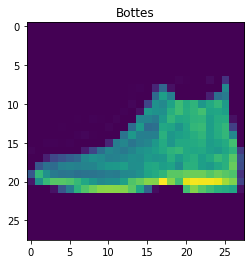

In [20]:
plt.imshow(images_test[0])

plt.title(targets_names[targets_test[0]])

print('targets associer à :',targets_test[0])

#print('targets associer à :',targets_val[0])

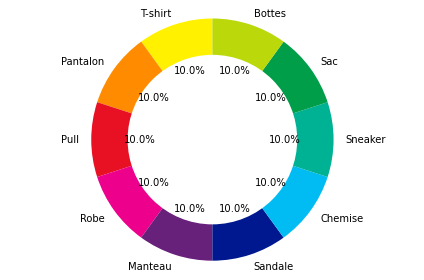

In [21]:
#VERIFICATION QUE LES DONNEES SONT EQUILIRES

# Noms des catégories et fréquences d'apparitions

labels = targets_names
sizes = np.unique(targets_train,return_counts=True)[1]

# Choix des couleurs

colors =['#fff100','#ff8c00','#e81123','#ec008c','#68217a',    '#00188f',
'#00bcf2','#00b294','#009e49','#bad80a']
 
# Construction du diagramme et affichage des labels et des #fréquences en pourcentage

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

# Tracé du cercle au milieu

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Affichage du diagramme

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [38]:
# On converti nos valeurs en float

images_train = images_train.astype(float)
images_test = images_test.astype(float)

# On normalise les pixels pour avoir des valeurs entre 0 et 1

images_train = images_train/255
imagess_test = imagess_test/255

In [22]:
#creqtion du ;odel
model = tf.keras.models.Sequential()

#couche Flattern pour aplatir les images
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))


#construction des couches
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [8]:
#verification

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_output = model.predict(images_train[1:2])
print("shape of image after the flatten",model_output.shape)

shape of image after the flatten (1, 10)


In [55]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


In [59]:
history = model.fit(images_train,
                    targets_train,
                    epochs=10,
                    validation_split=0)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 53s 885us/sample - loss: 0.3153 - accuracy: 0.8937
Epoch 2/10
60000/60000 [==============================] - 53s 888us/sample - loss: 0.3073 - accuracy: 0.8938
Epoch 3/10
60000/60000 [==============================] - 55s 914us/sample - loss: 0.2955 - accuracy: 0.8974
Epoch 4/10
60000/60000 [==============================] - 52s 863us/sample - loss: 0.3089 - accuracy: 0.8971
Epoch 5/10
60000/60000 [==============================] - 51s 855us/sample - loss: 0.2893 - accuracy: 0.8978
Epoch 6/10
60000/60000 [==============================] - 52s 871us/sample - loss: 0.2862 - accuracy: 0.8998
Epoch 7/10
60000/60000 [==============================] - 54s 896us/sample - loss: 0.2850 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 54s 895us/sample - loss: 0.2949 - accuracy: 0.8978
Epoch 9/10
60000/60000 [==============================] - 54s 906us/sample - loss: 0.2898 - accuracy: 0.9

In [60]:
loss, acc = model.evaluate(images_test, targets_test)

10000/10000 [==============================] - 4s 437us/sample - loss: 0.4247 - accuracy: 0.8676


In [ ]:
model_otput = model.predict(images_train[0:1])

print("shape of image after the flatten",model_output.shape)

targets associer à : 3


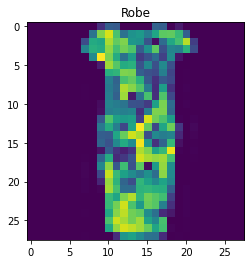

In [75]:
plt.imshow(images_test[100])

plt.title(targets_names[targets_test[100]])

print('targets associer à :',targets_test[100])

#print('targets associer à :',targets_val[0])

In [76]:
model_output = model.predict(images_test[100:101])
#print(model_output)
def ind(tab):
    i = 0
    maximum = max(tab) 
    for k in tab:
        if k == maximum:
            return i
        i = i+1
            
model_output = model_output[0]     

m = ind(model_output)
print('Cette image corespond la cathegorie :',targets_names[m])
        

#print(model_output[0])
#print("shape of image a

Cette image corespond la cathegorie : Robe


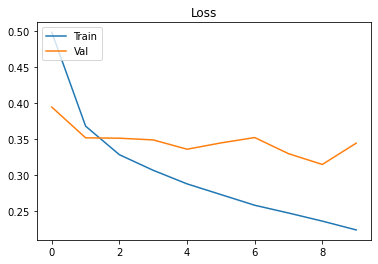

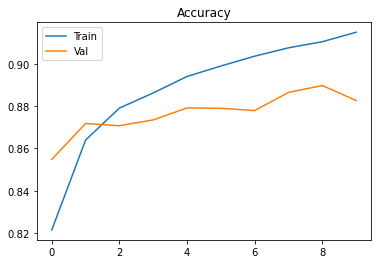

In [18]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [45]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

10000/10000 [==============================] - 8s 751us/sample - loss: 0.3690 - accuracy: 0.8810
Test Loss 0.3690178635120392
Test Accuracy 0.881


targets associer à : 3


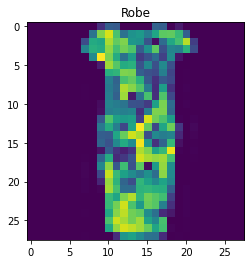

In [90]:
plt.imshow(images_test[100])
plt.title(targets_names[targets_test[100]])

print('targets associer à :',targets_test[100])

In [92]:
model_ouput = model.predict(images_test[100:103])

print(model_output, targets_test[100:103])


[[9.99810517e-01 9.10740730e-16 1.10800875e-05 7.14115256e-09
  9.29862978e-08 5.68918690e-10 1.78300761e-04 5.83322538e-15
  2.30707787e-13 2.51947543e-11]] [3 6 7]


In [5]:
print(images_train.shape)
print(targets_train.shape)

(60000, 28, 28)
(60000,)


In [131]:
#images_train = images_train[:10000]
#targets_train = targets_train[:10000]

In [132]:
print(images_train.shape)
print(targets_train.shape)

(10000, 28, 28)
(10000,)


In [12]:
images_train = images_train.reshape(-1,28,28,1)
images_test = images_test.reshape(-1,28,28,1)

images_train = images_train.astype('float')/255
images_test = images_test.astype('float')/255

In [13]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))

model.add(tf.keras.layers.Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(256, 
                 kernel_size=(3, 3), 
                 activation='relu'))

model.add(tf.keras.layers.Conv2D(256, 
                 kernel_size=(3, 3), 
                 padding='same',
                 activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [14]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)



In [ ]:
history = model.fit(images_train,
                    targets_train,
                    epochs=10,
                    validation_split=0
                    )

Train on 60000 samples
Epoch 1/10
  704/60000 [..............................] - ETA: 8:47:25 - loss: 1.8201 - accuracy: 0.3182

In [93]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

10000/10000 [==============================] - 4s 398us/sample - loss: 0.5959 - accuracy: 0.8659
Test Loss 0.5959023759007454
Test Accuracy 0.8659


targets associer à : 0


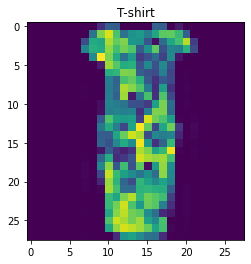

In [86]:
plt.imshow(images_test[100])
plt.title(targets_names[targets_test[1000]])

print('targets associer à :',targets_test[1000])

In [92]:
model_output = model.predict(images_test[1000:1001])
#print(model_output)
def ind(tab):
    i = 0
    maximum = max(tab) 
    for k in tab:
        if k == maximum:
            return i
        i = i+1
            
model_output = model_output[0]     

m = ind(model_output)
print('Cette image corespond la cathegorie :',targets_names[m])

Cette image corespond la cathegorie : Chemise


KeyError: 'val_loss'

In [ ]:
oss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)